In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from utils import *
import glob
from scipy import stats

In [170]:
#reading data
d='/glade/derecho/scratch/djk2120/postp/jas/'
dvs=['SOILWATER_10CM','ET','EFLX_LH_TOT']
ds=xr.Dataset()
for v in dvs:
    files=sorted(glob.glob(d+v+'*.nc'))
    ds[v]=xr.open_mfdataset(files,combine='by_coords')[v]
et=24*60*60*92*ds.ET.sel(year=yrs).stack({'ey':['ens','year']}).swap_dims({'ey':'year'})
et['year']=et.year.values

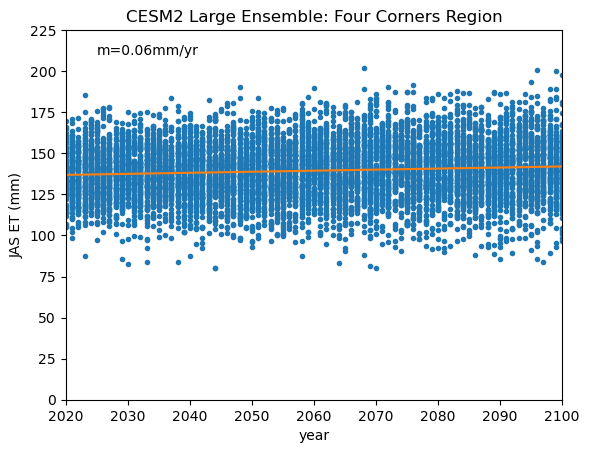

In [171]:
#regress
p = et.polyfit(dim='year', deg=1)

#plotting
plt.plot(et.year, et, 'C0.')
xr.polyval(et.year, p.polyfit_coefficients).plot(color='C1')

#add slope as text
m = np.round(p.polyfit_coefficients.sel(degree=1).values, 2)
plt.text(2025, 210, 'm='+str(m)+'mm/yr')

#format plot
plt.xlim([2020, 2100])
plt.ylim([0, 225])
plt.ylabel('JAS ET (mm)')
plt.title('CESM2 Large Ensemble: Four Corners Region');

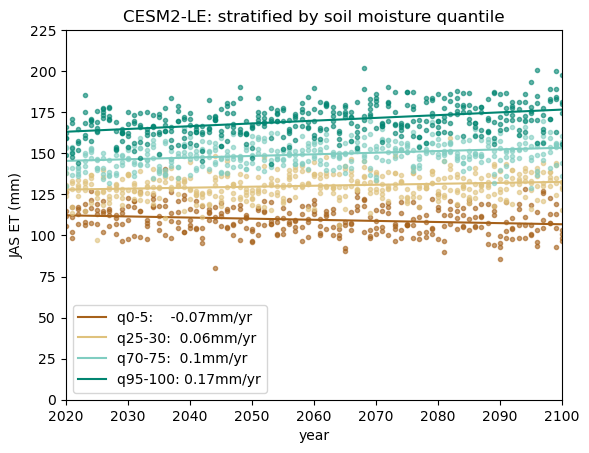

In [179]:
colors = ['#a6611a', '#dfc27d', '#80cdc1', '#018571']
qqs = [(0, 0.05), (0.25, 0.3), (0.7, 0.75), (0.95, 1)]
yrs = slice(2020, 2100)
s = ds.SOILWATER_10CM.sel(year=yrs)
et = 24*60*60*92*ds.ET.sel(year=yrs)
for qq, c in zip(qqs, colors):
    ixdry = ((s > s.quantile(qq[0], dim='ens')) &
             (s <= s.quantile(qq[1], dim='ens'))).stack({'ey': ['year', 'ens']}).compute()
    etdry = et.stack({'ey': ['year', 'ens']}).isel(ey=ixdry).swap_dims({'ey': 'year'})
    etdry['year'] = etdry.year.values
    p = etdry.polyfit(dim='year', deg=1)
    m = np.round(p.polyfit_coefficients.sel(degree=1).values, 2)
    label = ('q'+str(int(100*qq[0]))+'-'+str(int(100*qq[1]))+':').ljust(9)+str(m) + 'mm/yr'
    etdry.plot.line('.', color=c, alpha=0.6)
    xr.polyval(etdry['year'], p.polyfit_coefficients).plot(color=c, label=label)
plt.ylim([0, 225])
plt.xlim([2020, 2100])
plt.ylabel('JAS ET (mm)')
plt.legend()
plt.title('CESM2-LE: stratified by soil moisture quantile')
plt.savefig('../figs/supp/et_trends.png', dpi=300, bbox_inches='tight')

In [9]:
ee=1


In [ ]:
def get_files(v,ee):
    files=[]
    

In [51]:
24*60*60*31

2678400

<xarray.DataArray 'dayofyear' ()>
array(31)

In [23]:
def gfiles(v,ee):

    top='/glade/campaign/cesm/development/cvcwg/cvwg/f.e21.FHIST_FSSP370_BGC.f09_f09.ersstv5.goga/'
    d=top+'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.ens{}/lnd/proc/tseries/month_1/'
    f0=d+'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.ens{}.clm2.h0.{}.*.nc'
    top='/glade/campaign/cesm/development/cvcwg/cvwg/f.e21.FHIST_FSSP370_BGC.f09_f09.ersstv5.goga/'
    d=top+'f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}/lnd/proc/tseries/month_1/'
    f1=d+'f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}.clm2.h0.{}.*.nc'
    
    files=[*sorted(glob.glob(f0.format(str(ee).zfill(2),str(ee).zfill(2),v))),
           *sorted(glob.glob(f1.format(str(ee).zfill(2),str(ee).zfill(2),v)))]
    return files


In [14]:
dvs=['RAIN','SNOW','QVEGT','QVEGE','QSOIL','EFLX_LH_TOT','FSH','SOILWATER_10CM']
files=[]
for ee in range(1,11):
    for v in dvs:
        next=glob.glob(f0.format(str(ee).zfill(2),str(ee).zfill(2),v))
        for f in next:
            files.append(f)

In [40]:
v='QSOIL'
files=[gfiles(v,ee) for ee in range(1,11)]

In [41]:
ds=fix_time(xr.open_mfdataset(files,combine='nested',concat_dim=['ens','time']))

In [44]:
tmp=xr.open_dataset(files[0][-1])
la=tmp.area*tmp.landfrac*get_foco(tmp)
da=get_jas(ds[v],la)

In [47]:
d='/glade/derecho/scratch/djk2120/postp/jas/'
fout=d+'goga.'+v+'.nc'
xr.Dataset({v:da}).to_netcdf(fout)

In [137]:
f='/glade/derecho/scratch/djk2120/postp/jas/cce_era5_i04.nc'
cce=xr.open_dataset(f)

In [69]:
d='/glade/campaign/cesm/development/cvcwg/cvwg/f.e21.FHIST_FSSP370_BGC.f09_f09.ersstv5.goga/f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.ens{}/lnd/proc/tseries/month_1/'
f0=[d+'f.e21.FHIST_BGC.f09_f09.historical.ersstv5.goga.ens{}.clm2.h0.{}.188001-201412.nc']
d='/glade/campaign/cesm/development/cvcwg/cvwg/f.e21.FHIST_FSSP370_BGC.f09_f09.ersstv5.goga/f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}/lnd/proc/tseries/month_1/'
files=['f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}.clm2.h0.{}.201501-201912.nc',
       'f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}.clm2.h0.{}.202001-202012.nc',
       'f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}.clm2.h0.{}.202101-202104.nc',
       'f.e21.FSSP370_BGC.f09_f09.ssp370.ersstv5.goga.{}.clm2.h0.{}.202105-202112.nc']
for f in files:
    f0.append(d+f)

In [92]:
dvs=['RAIN','SNOW','QVEGT','QVEGE','QSOIL','SOILWATER_10CM']
ds=[]
for v in dvs:
    print(v)
    files=[[f.format(str(ee).zfill(2),str(ee).zfill(2),v) for f in f0] for ee in range(1,11)]
    tmp=xr.open_mfdataset(files,combine='nested',concat_dim=['ens','time'],parallel=True)
    if not ds:
        ds=tmp
    else:
        ds[v]=tmp[v]

ds=fix_time(ds).sel(time=slice('1990','2021'))
ds['PREC']=ds.RAIN+ds.SNOW
ds['ET']=ds.QVEGT+ds.QVEGE+ds.QSOIL


RAIN
SNOW
QVEGT
QVEGE
QSOIL
SOILWATER_10CM


In [78]:
tmp=xr.open_dataset(files[0][0])
la=tmp.area*tmp.landfrac*get_foco(tmp)

In [116]:
x=sw.values.ravel()
y=cf*et.values.ravel()

In [134]:
xmin=13.8
xmax=22.5
ymin=65
ymax=173

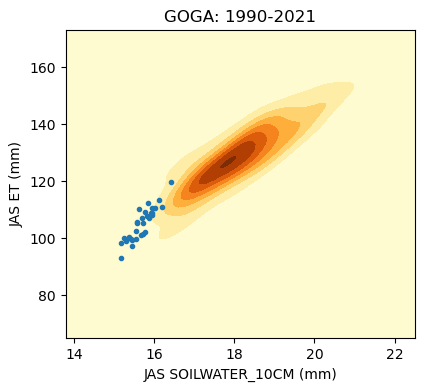

In [144]:
plt.figure(figsize=[4.5,4])
kernel=stats.gaussian_kde(np.array([x,y]))
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)
plt.contourf(X,Y,Z,cmap='YlOrBr');
plt.plot(cce.SOILWATER_10CM.sel(year=2020),
         cf*cce.ET.sel(year=2020),'.')

plt.xlabel('JAS SOILWATER_10CM (mm)')
plt.ylabel('JAS ET (mm)');
plt.title('GOGA: 1990-2021');
plt.savefig('../figs/supp/goga_contour_sw_et.png',dpi=300,bbox_inches='tight')

<xarray.DataArray 'SOILWATER_10CM' (ens: 30)>
[30 values with dtype=float64]
Coordinates:
    year     int64 2020
    time     object ...
Dimensions without coordinates: ens

In [ ]:
def cplots(v1,v2):
    plt.figure(figsize=[15,4])
    for i,yr in enumerate([1860,2020,2090]):
        x=jas['LENS2'][yr][v1].values.ravel()
        y=jas['LENS2'][yr][v2].values.ravel()

        xc=jas['CCE'][yr][v1]
        yc=jas['CCE'][yr][v2]


        xmin,xmax=findlims(v1,qq=0.05)
        ymin,ymax=findlims(v2,qq=0.05)

        kernel=stats.gaussian_kde(np.array([x,y]))
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]  
        positions = np.vstack([X.ravel(), Y.ravel()])
        Z = np.reshape(kernel(positions).T, X.shape)


        plt.subplot(1,3,i+1)
        plt.contourf(X,Y,Z,cmap='YlOrBr')
        plt.plot(xc,yc,'.',color='#1a658fff');
        plt.xlim([xmin,xmax])
        plt.ylim([ymin,ymax])

        plt.title(yr)

        if i==0:
            plt.ylabel(v2)
        plt.xlabel(v1)
        
        #f='../figs/DTF/contours/'+v1+'_'+v2+'.png'
        #plt.savefig(f,dpi=300,bbox_inches='tight')

In [97]:
rain=get_jas(ds.PREC,la)
et=get_jas(ds.ET,la)
sw=get_jas(ds.SOILWATER_10CM,la)

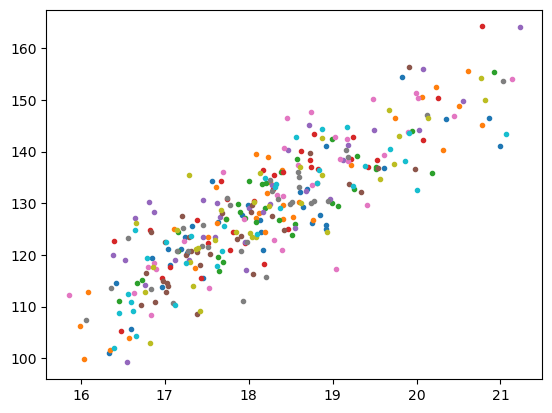

In [98]:
cf=24*60*60*92
plt.plot(sw,cf*et,'.');

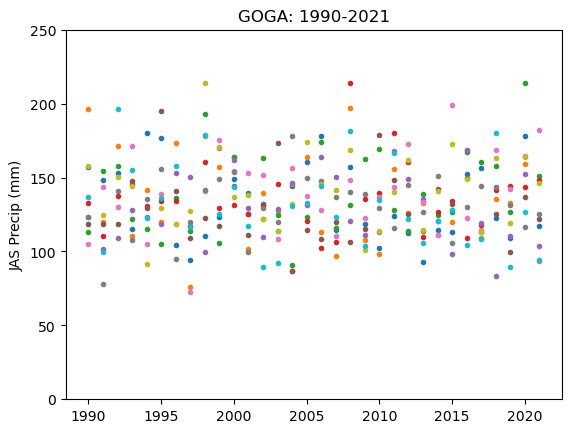

In [105]:
plt.plot(rain.year,cf*rain,'.');
plt.ylim([0,250])
plt.ylabel('JAS Precip (mm)')
plt.title('GOGA: 1990-2021');

In [3]:
client=get_cluster()

/glade/work/djk2120/miniconda3/envs/ppe-py/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39123 instead
  warnings.warn(


In [4]:
help(get_files)

Help on function get_files in module utils:

get_files(exp, cmp='/lnd/', tape='h0')



In [32]:
help(get_ds)

Help on function get_ds in module utils:

get_ds(exp, dvs, cmp='/lnd/', tape='h0', a=slice(10, 60, None), o=slice(225, 300, None), parallel=True)



In [110]:
sw=get_ds('2020_lens',['SOILWATER_10CM'],tape='h5')

In [114]:
sw.ens

<xarray.DataArray 'ens' (ens: 90)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
       72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89])
Dimensions without coordinates: ens

In [113]:
sw.SOILWATER_10CM.sel(time='2020-04-01')

<xarray.DataArray 'SOILWATER_10CM' (ens: 90, time: 1, lat: 53, lon: 61)>
dask.array<getitem, shape=(90, 1, 53, 61), dtype=float32, chunksize=(1, 1, 53, 61), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 225.0 226.2 227.5 228.8 ... 296.2 297.5 298.8 300.0
  * lat      (lat) float32 10.84 11.78 12.72 13.66 ... 57.02 57.96 58.9 59.84
  * time     (time) object 2020-04-01 00:00:00
Dimensions without coordinates: ens
Attributes:
    long_name:     soil liquid water + ice in top 10cm of soil (veg landunits...
    units:         kg/m2
    cell_methods:  time: mean

In [102]:
ds=get_ds('2090_era5_i04',['TMQ'],a=slice(0,70),o=slice(120,300),cmp='/atm/')
lens=get_ds('2090_lens',['TMQ'],a=slice(0,70),o=slice(120,300),cmp='/atm/')

In [104]:
sw=get_ds('2090_lens',['SOILWATER_10CM'])
la=get_foco(sw)*sw.la
s=get_jas(sw.SOILWATER_10CM,la)
ix=(s.stack({'ey':['ens','year']})<s.quantile(0.05)).compute()

In [105]:
ixt=lens['time.month']==8
tmq_lens=lens.TMQ.isel(time=ixt).stack({'ey':['ens','time']}).isel(ey=ix.values).mean(dim='ey').compute()

In [98]:
cmap=plt.get_cmap('viridis',10)

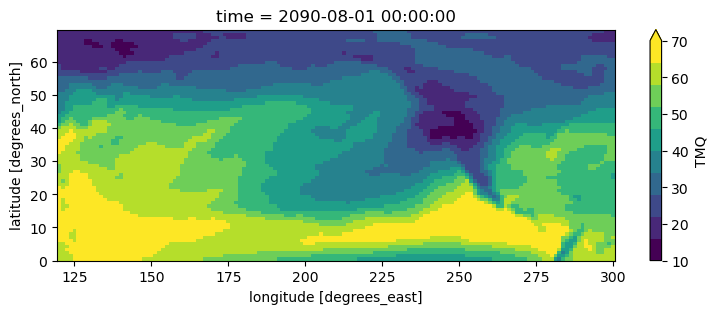

In [107]:
plt.figure(figsize=[9,3])
ds.TMQ.isel(time=4).mean(dim='ens').plot(cmap=cmap,vmin=10,vmax=70)

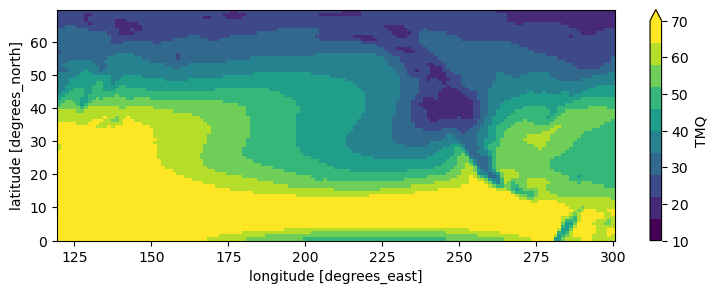

In [108]:
plt.figure(figsize=[9,3])
tmq_lens.plot(vmin=10,vmax=70,cmap=cmap)

In [64]:
yrs=['2020','2090']
dvs=['SOILWATER_10CM','RAIN','SNOW','TSA','RH2M','QBOT',
     'QVEGT','QVEGE','QSOIL']
cce={yr:get_ds(yr+'_era5_i04',dvs) for yr in yrs}
lens={yr:get_ds(yr+'_lens',dvs) for yr in yrs}
ds=lens['2020']
la=get_foco(ds)*ds.la

In [71]:
lens={yr:get_ds(yr+'_lens',dvs) for yr in yrs}
ds=lens['2020']
la=get_foco(ds)*ds.la

In [84]:
x={'lens':{}}
x['cce']={yr:cce[yr].RH2M.isel(time=5) for yr in yrs}

In [85]:
xs={}
for yr in yrs:
    ds=lens[yr]
    sw=get_jas(ds.SOILWATER_10CM,la).stack({'ey':['ens','year']})
    qq=sw.quantile(0.05)
    ix=(sw<qq)
    ixm=ds['time.month']==9
    v='RH2M'
    x['lens'][yr]=ds[v].isel(time=ixm).stack({'ey':['ens','time']}).isel(ey=ix.values).compute()


In [86]:
dx={exp:x[exp]['2090'].mean(dim=d)-x[exp]['2020'].mean(dim=d) for exp,d in zip(['cce','lens'],['ens','ey'])}

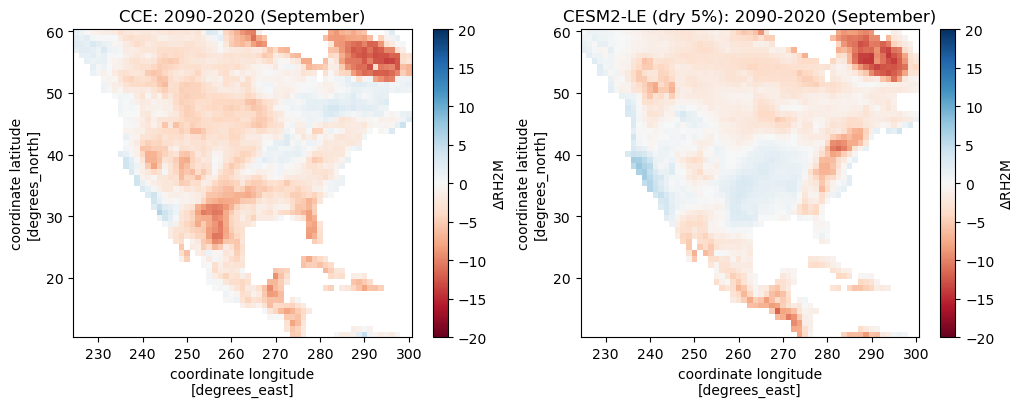

In [88]:
titles={'cce':'CCE: 2090-2020 (September)',
        'lens':'CESM2-LE (dry 5%): 2090-2020 (September)'}
plt.figure(figsize=[12,4])
for i,exp in enumerate(dx):
    plt.subplot(121+i)
    dx[exp].plot(cmap='RdBu',vmax=20,vmin=-20,cbar_kwargs={'label':'$\Delta$RH2M'})
    plt.title(titles[exp])

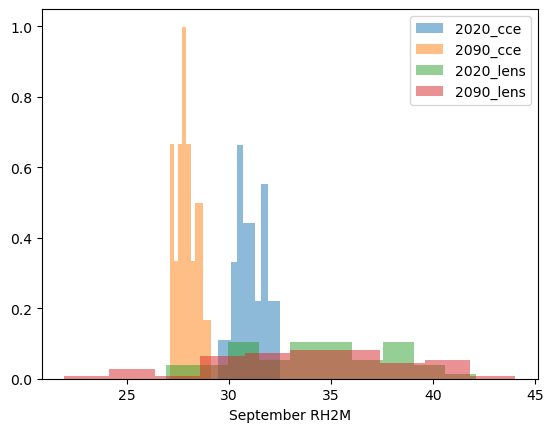

In [99]:
for exp in ['cce','lens']:
    for yr in yrs:
        rh=1/la.sum()*(la*x[exp][yr]).sum(dim=['lat','lon'])
        plt.hist(rh,alpha=0.5,density=True,label=yr+'_'+exp)
plt.legend()
plt.xlabel('September RH2M');

In [107]:
help(gmean)

Help on function gmean in module utils:

gmean(da, la)



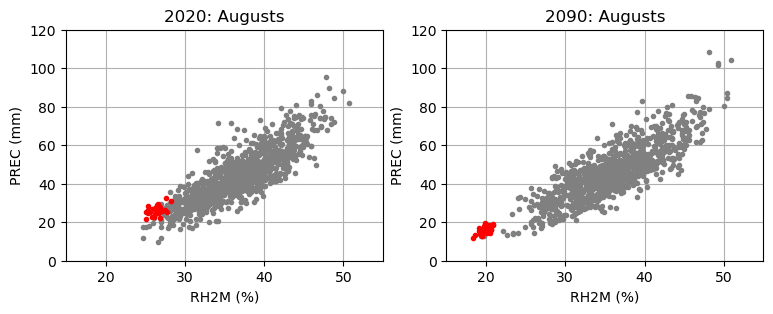

In [131]:
plt.figure(figsize=[9,3])
for i,yr in enumerate(yrs):
    plt.subplot(121+i)
    for ds,c in zip([lens[yr],cce[yr]],['gray','red']):
        ixm=ds['time.month']==8
        x=gmean(ds['RH2M'].isel(time=ixm),la)
        y=24*60*60*31*gmean(ds['PREC'].isel(time=ixm),la)
    
        plt.plot(x,y,'.',color=c)
    plt.xlim([15,55])
    plt.ylim([0,120])
    plt.grid()
    plt.title(yr+': Augusts')
    plt.xlabel('RH2M (%)')
    plt.ylabel('PREC (mm)')

In [125]:
gmean(cce['2020'].PREC.isel(time=4),la).mean()

<xarray.DataArray ()>
array(1.02677495e-05)
Coordinates:
    time     object 2020-07-01 00:00:00

In [127]:
gmean(cce['2090'].PREC.isel(time=4),la).mean()

<xarray.DataArray ()>
array(6.04998795e-06)
Coordinates:
    time     object 2090-08-01 00:00:00